In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

$
\begin{gather}
\frac{x-x_1}{x_2-x_1}=\frac{y-y_1}{y_2-y_1} \\
\Downarrow \\
(y_2-y_1)x+(x_1-x_2)y+(x_2y_1-x_1y_2)=0 \\
\Downarrow \\
y = \frac{y_2-y_1}{x_2-x_1}x + \frac{x_2y_1-x_1y_2}{x_2-x_1}
\end{gather}
$

In [148]:
interval = np.array([-1., 1.])

In [120]:
n_points = 100
points = np.append(np.ones((n_points,1)),
                   np.random.uniform(*interval, (n_points, 2)),
                   axis=1)

In [266]:
def get_line(x1, y1, x2, y2):
    """
    Build a 2D line by two points.
    Returns line's function, weight vector (w0, w1, w2), slope and intercept
    """
    A = y2 - y1
    B = x1 - x2
    C = x2*y1 - x1*y2
    
    @np.vectorize
    def line(x):
        return A/-B*x + C/-B
    
    return line, np.array([C, A, B]), A/-B, C/-B

support_points = np.random.uniform(*interval, 4)
#support_points = 0, 0, 1, 1
f, w, slope, intercept = get_line(*support_points)

dotp = np.fromiter([np.dot(p, w) for p in points], dtype=np.float, count=n_points)

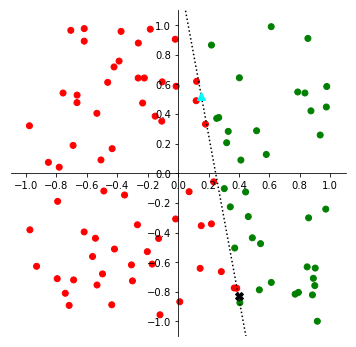

In [280]:
plt.figure(figsize=(6,6))
plt.xlim(*interval*1.1)
plt.ylim(*interval*1.1)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ticks = np.linspace(*interval, 11)
plt.xticks(ticks)
plt.yticks(ticks)

plt.plot(interval, f(interval), linestyle=':', color='black')
plt.plot(*support_points[:2], color='black', marker='X', markersize=8)
plt.plot(*support_points[-2:], color='cyan', marker='^', markersize=8)
plt.scatter(*points[:, 1:].T, c=[('r', 'g')[val > 0] for val in dotp])

plt.show()